## Quality Assessment
Affandy Fahrizain - J4332c

In [1]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import os
import pandas as pd

from piq import TVLoss, BRISQUELoss

### IMPORTANT ###
# Clone NIMA from https://github.com/aigagror/ML-Aesthetics-NIMA to your directory
# (Optional) Change folder name into ml_aesthetic_nima
# Then change weight_path in main.py into ./ml_aesthetic_nima/weights/...
import sys
sys.path.append('./ml_aesthetic_nima/')

import ml_aesthetic_nima
from ml_aesthetic_nima import main as nima

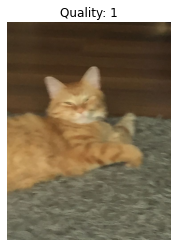

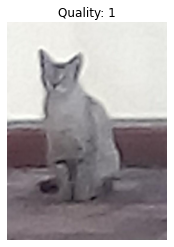

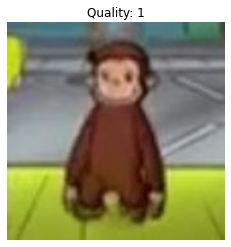

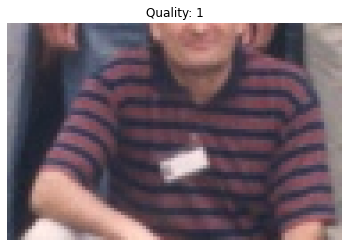

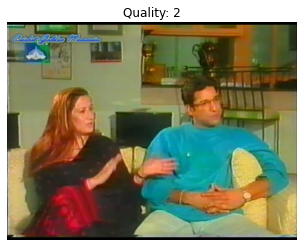

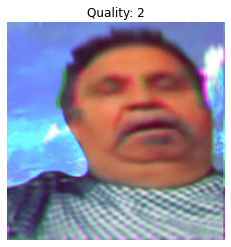

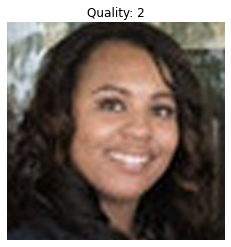

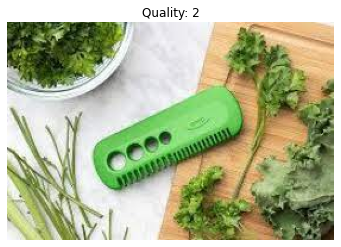

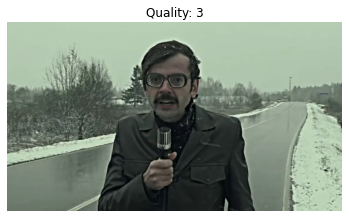

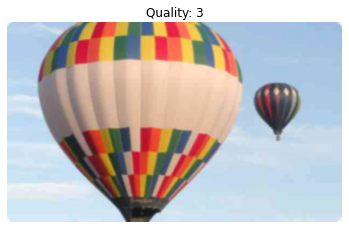

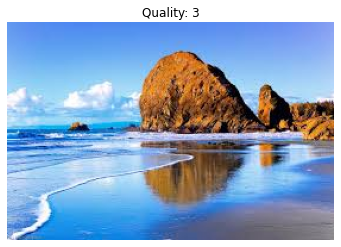

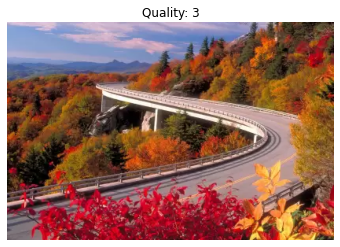

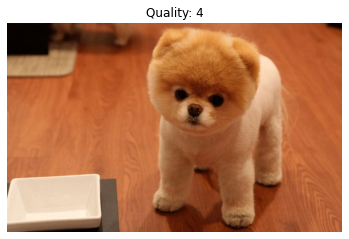

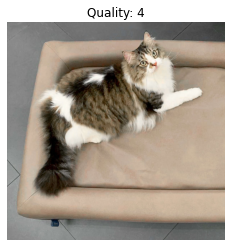

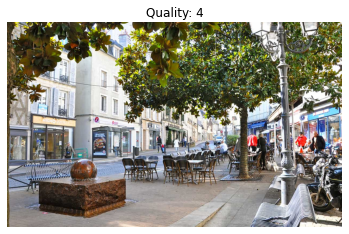

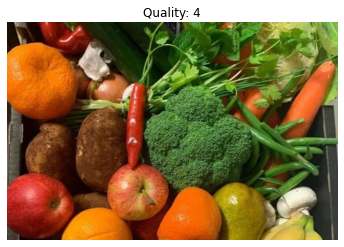

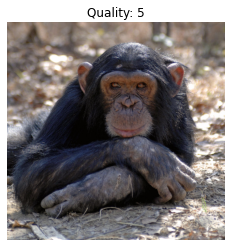

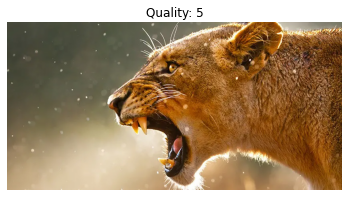

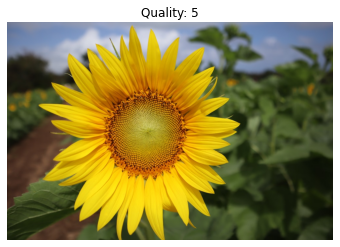

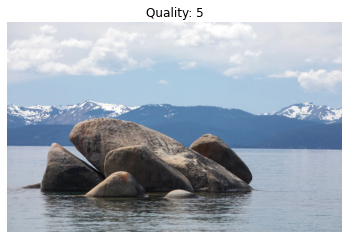

In [2]:
paths = os.listdir('./data')

for p in paths:
    plt.imshow(Image.open(f'./data/{p}'))
    plt.title(f'Quality: {p[0]}')
    plt.axis('off')
    plt.show()

In [19]:
def eval_quality(path, plot=False):
    label = path[0]
    x = torch.tensor(plt.imread(f'./data/{path}'))
    x = x.permute(2,0,1)[None, :, :, :] / 255.
    brisque = BRISQUELoss(data_range=1.)(x).item()
    tv = TVLoss()(x).item()
    _, nima_mean, nima_std = nima.rate(f'./data/{path}')

    if plot:
        plt.imshow(Image.open(f'./data/{path}'))
        plt.title(f'''
        H: {path[0]}, B: {brisque:.3f}, T: {tv:.3f}, N Mean: {nima_mean:.3f}, N Std: {nima_std:.3f}''')
        plt.axis('off')
        plt.show()

    return {
        'human': int(label),
        'brisque': brisque,
        'tv': tv,
        'nima_mean': nima_mean,
        'nima_std': nima_std
    }

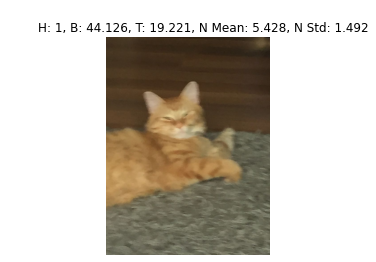

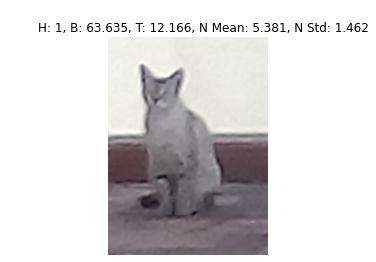

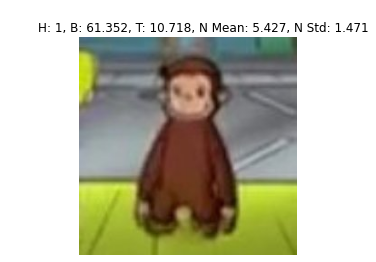

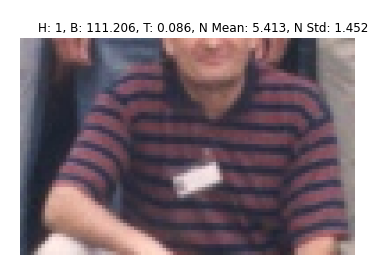

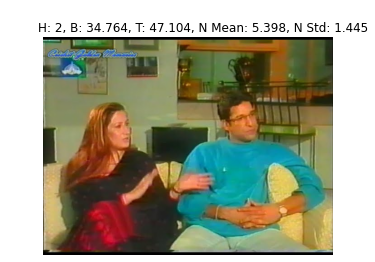

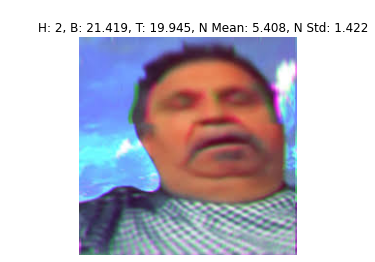

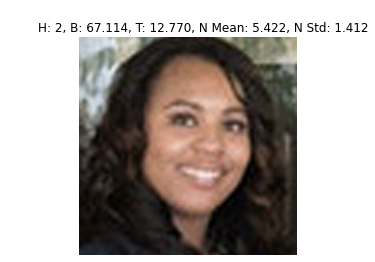

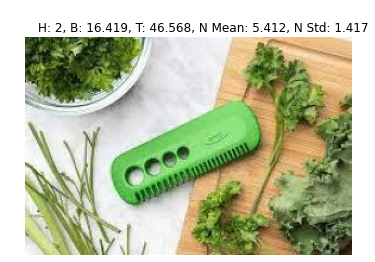

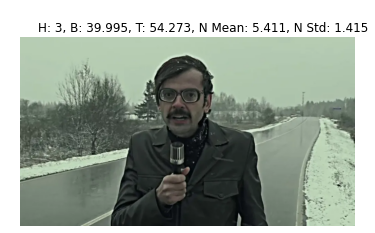

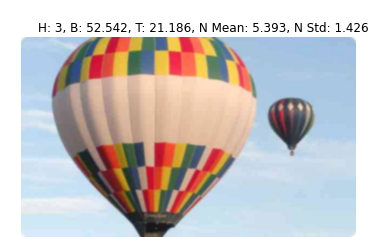

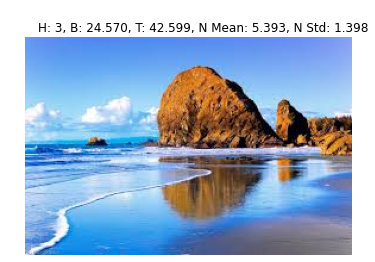

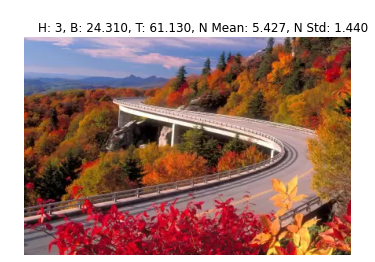

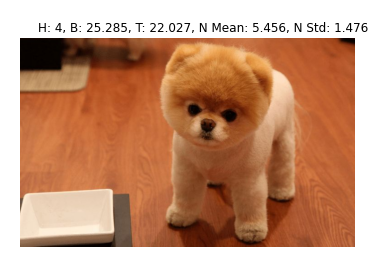

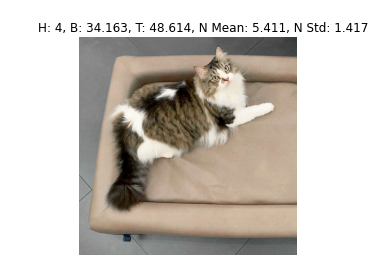

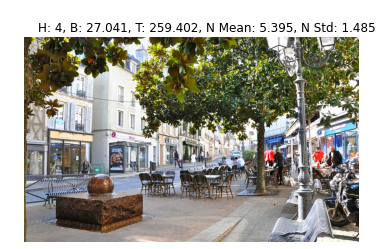

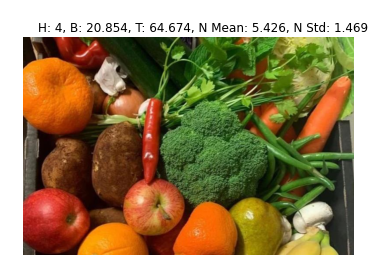

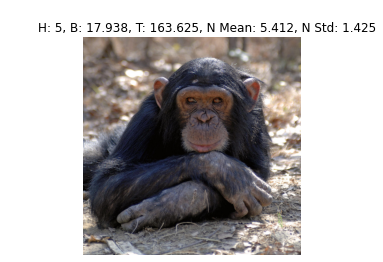

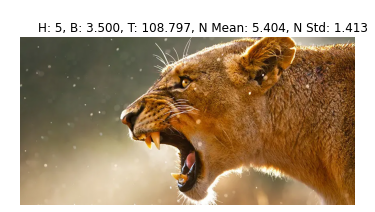

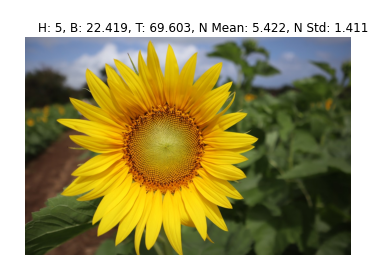

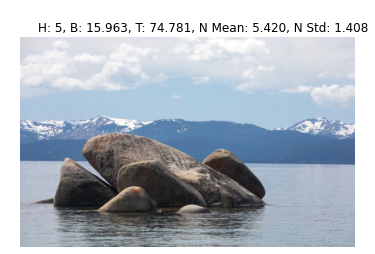

In [20]:
result = []

for path in paths:
    result.append(eval_quality(path, plot=True))

In [21]:
df_result = pd.DataFrame(result)
df_result.head()

human     brisque         tv  nima_mean  nima_std
0      1   44.126160  19.220934   5.428078  1.491751
1      1   63.634949  12.165906   5.380502  1.462335
2      1   61.351746  10.718214   5.426682  1.470751
3      1  111.206238   0.086199   5.412991  1.451717
4      2   34.763855  47.103878   5.397898  1.445152

In [22]:
df_result.corr()

human   brisque        tv  nima_mean  nima_std
human      1.000000 -0.693635  0.605107   0.144393 -0.360759
brisque   -0.693635  1.000000 -0.480658  -0.095757  0.271856
tv         0.605107 -0.480658  1.000000  -0.210380  0.080829
nima_mean  0.144393 -0.095757 -0.210380   1.000000  0.256835
nima_std  -0.360759  0.271856  0.080829   0.256835  1.000000

Based on the correlation result, BRISQUE is most correlated one with human opinion then followed by TV. BRISQUE has negative correlation value because it says better image quality when the score is lower. Hence, it has negative but strong correlation with human opinion.